In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("./heart_failure_clinical_records_dataset.csv")

In [4]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
df.DEATH_EVENT.value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

1.What is the distribution of age among heart failure patients in the dataset

Text(0.5, 1.0, 'Distribution of Age')

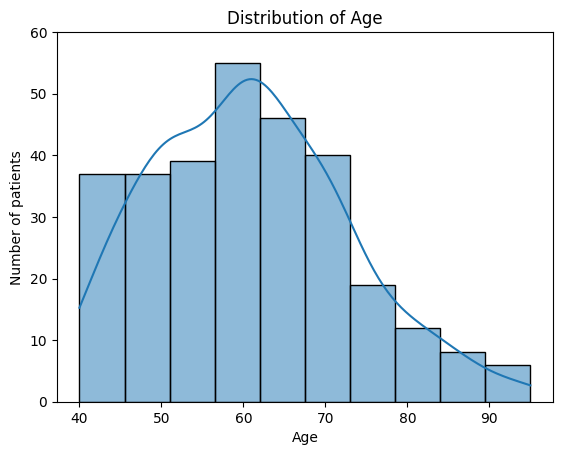

In [26]:
sns.histplot(df['age'],bins=10,kde=True)
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.ylim(0,60)
plt.title('Distribution of Age')

 2. How does the death rate vary with age

In [7]:
death_rate = pd.crosstab(df.age,df.DEATH_EVENT)

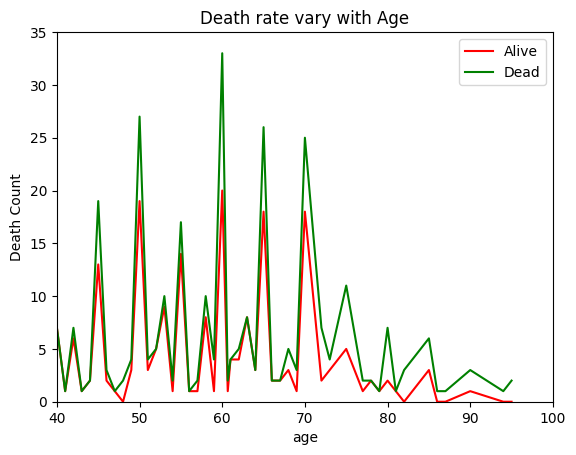

In [25]:
death_rate.plot(kind='line',stacked=True,color = ['red','green'])
plt.xlim(40,100)
plt.ylim(0,35)
plt.ylabel('Death Count')
plt.title('Death rate vary with Age')
plt.legend(['Alive','Dead'])

In [27]:
df.sex.replace({0:'Female',1:'Male'},inplace=True)

3. What is the percentage of male and female patients in the dataset?

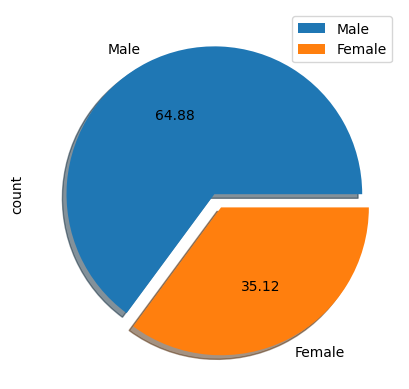

In [10]:
df.sex.value_counts().plot.pie(autopct='%.2f',shadow=True,explode=(0,0.1))
plt.legend(['Male','Female'])

4. How does the platelet count vary among different age groups

Text(0.5, 1.0, 'Platelets Count vary with Age')

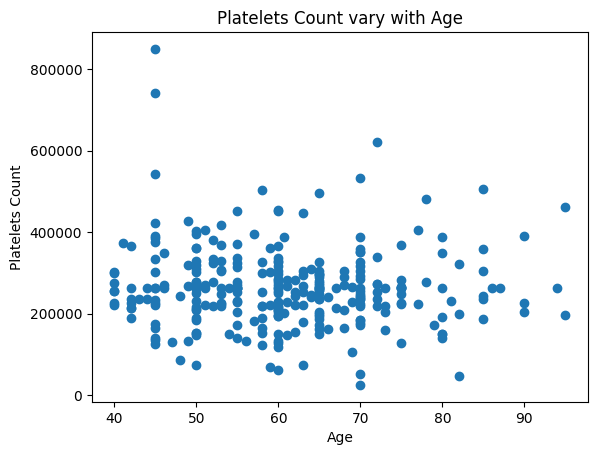

In [11]:
plt.scatter(df['age'], df['platelets'], marker='o')
plt.xlabel('Age')
plt.ylabel('Platelets Count')
plt.title('Platelets Count vary with Age')

5. Is there a correlation between creatinine and sodium levels in the blood

In [12]:
creatinine_sodium = pd.crosstab(df.serum_creatinine,df.serum_sodium)

In [13]:
correlation = df['serum_creatinine'].corr(df['serum_sodium'])

In [14]:
correlation

-0.18909521009117392

Text(0.5, 1.0, 'serum_creatinine vs serum_sodium')

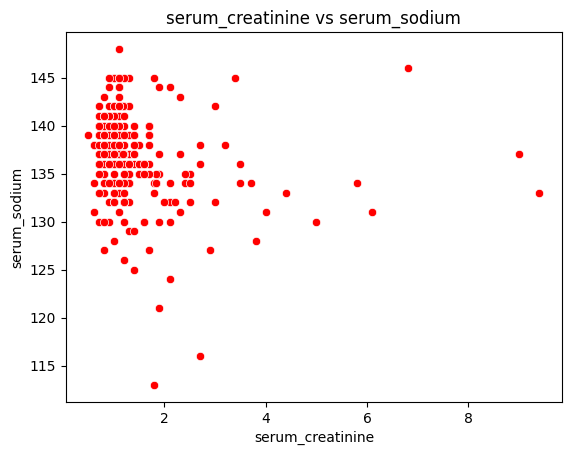

In [37]:
sns.scatterplot(x=df.serum_creatinine,y = df.serum_sodium,color = 'red')
plt.xlabel('serum_creatinine')
plt.ylabel('serum_sodium')
plt.title('serum_creatinine vs serum_sodium')

In [39]:
prevalence = pd.crosstab(df.high_blood_pressure,df.sex)

6. How does the prevalence of high blood pressure differ between male and female patients

<Axes: xlabel='high_blood_pressure'>

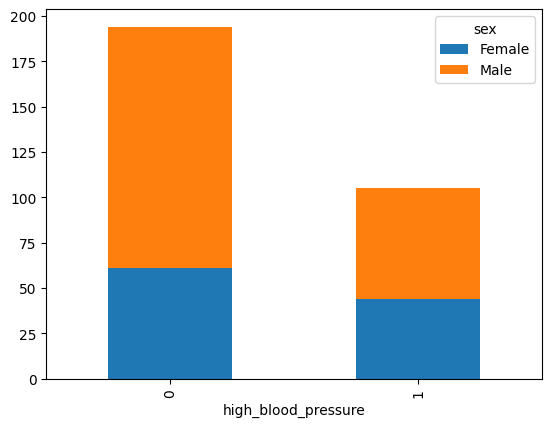

In [41]:
prevalence.plot(kind='bar',stacked=True)

In [42]:
smoking_habits = pd.crosstab(df.smoking,df.DEATH_EVENT)

7. What is the relationship between smoking habits and the occurrence of heart failure

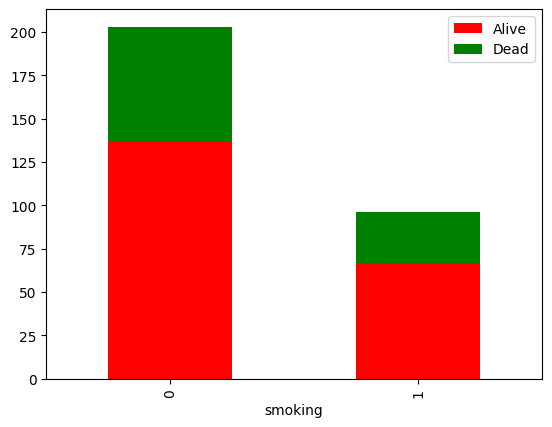

In [47]:
smoking_habits.plot(kind='bar',stacked=True,color = ['red','green'])
plt.legend(['Alive','Dead'])

8. Are there any noticeable patterns in the distribution of death events across different age groups

In [55]:
bins = [40, 50, 60, 70, 80, 90]
labels = ['40-50', '51-60', '61-70', '71-80', '81-90']
df['Age_Group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)


<Axes: xlabel='Age_Group', ylabel='Count'>

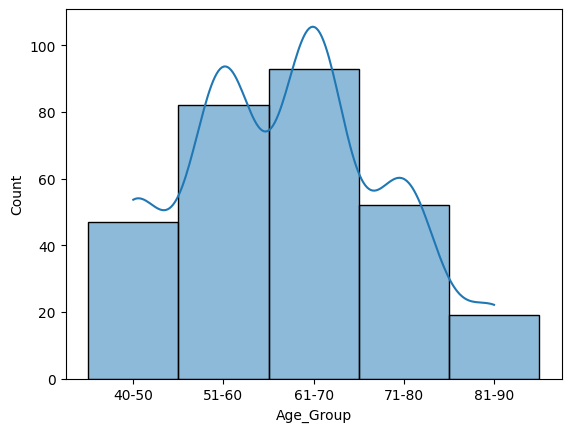

In [59]:
sns.histplot(df['Age_Group'],bins=5,kde=True)

9. Is there any significant difference in ejection fraction between patients with and without diabetes

<Axes: xlabel='diabetes', ylabel='ejection_fraction'>

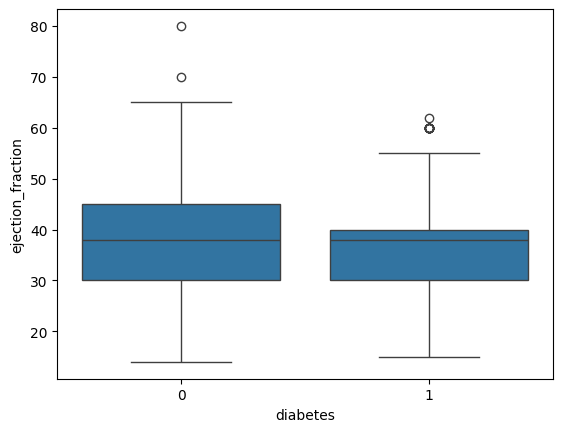

In [60]:
sns.boxplot(x = df.diabetes,y = df.ejection_fraction)

10. How does the serum creatinine level vary between patients who survived and those who did not?

<Axes: xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

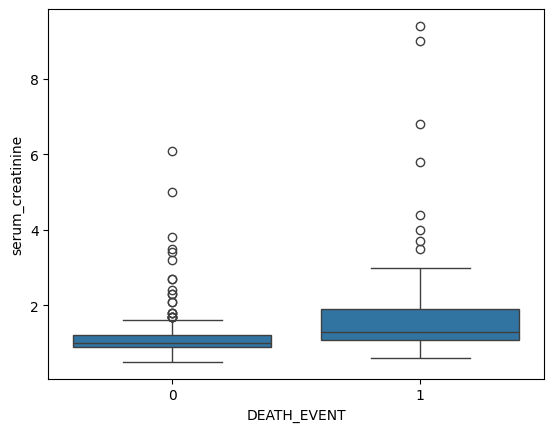

In [61]:
sns.boxplot(x=df.DEATH_EVENT,y=df.serum_creatinine)